---
<a name='title'></a>
# **<font color="Navy"> Temas Selectos </font>**
## **<font color="RoyalBlue"> Tema 3: Estadística </font>**
### **<font color="DodgerBlue"> Notebook 1: Regresión lineal </font>**
#### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

### **<font color="ForestGreen"> Introducción teórica a la regresión lineal </font>**


La regresión lineal es una herramienta estadística fundamental que se utiliza para entender la relación entre dos o más variables. En el contexto de las Ciencias de la Tierra, se puede aplicar para analizar y predecir fenómenos naturales, como la relación entre la temperatura del agua y la cantidad de oxígeno disuelto en un cuerpo de agua, la relación entre la concentración de ciertos minerales en el suelo y la biodiversidad de la vegetación, entre otros.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def grafico_linea_ts(xmin,xmax,xlab,ylab,title,ymin=None,ymax=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # poner las labels de los ejes y el titulo
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    # checar si queremos leyenda, si sí, la ponemos y fancy
    if legend:
        plt.legend(fontsize=12.5,fancybox=True,shadow=True)

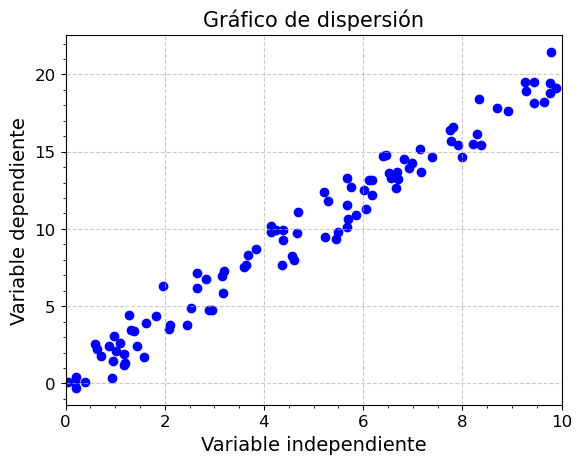

In [31]:
# Generar datos de ejemplo con menos correlación
np.random.seed(0)
X = 10 * np.random.rand(100)  # Variable independiente
y = 2 * X + np.random.randn(100) 

# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos')
grafico_linea_ts(0,10,'Variable independiente','Variable dependiente','Gráfico de dispersión')


Antes de empezar a hacer regresiones y usar paquetes vamos a repasar la fórmula de algunos estadísticos básicos como lo es la media y la desviación estándar. 

La media ($\mu$) de una población $X$ se define como:

\begin{align}
\mu=\frac{1}{N}\sum_{i=0}^{N} x_i
\end{align}

donde $x_i$ es cada elemento de nuestra población y $N$ es el número de observaciones.

Además, la varianza ($S^2$) está definida como:

\begin{align}
S^2=\frac{1}{N-1}\sum_{i=0}^{N} (x_i-\mu)^2
\end{align}

donde la desviación estándar es la raíz cuadrada de la varianza.

\begin{align}
\sigma=\sqrt{S^2}=S
\end{align}

En las siguientes celdas escribimos funciones para estos estadísticos y las comparamos con las funciones que nos arroja numpy.


In [32]:
def jorge_mean(X):
    N=len(X)
    suma=0
    for i in range(N):
        xi=X[i]
        suma+=xi
    promedio=suma/N
    return promedio

In [33]:
X.shape

(100,)

In [34]:
print('promedio numpy',np.mean(X))
print('promedio func',jorge_mean(X))

promedio numpy 4.727938395125177
promedio func 4.727938395125176


Ahora podemos comprobar la función de la varianza. 

Para esto, es importante calcular la diferencia, elemento a elemento, de $x$ con su promedio. Para visualizar esto puede ser útil escribir esta diferencia $x_i-\mu$ así en el código:

In [35]:
dif=X-np.mean(X)
N=len(X)
for index in range(N):
    print(index,'xi',X[index],'xbar',np.mean(X),'dif',dif[index])

0 xi 5.4881350392732475 xbar 4.727938395125177 dif 0.7601966441480705
1 xi 7.151893663724195 xbar 4.727938395125177 dif 2.423955268599018
2 xi 6.027633760716439 xbar 4.727938395125177 dif 1.299695365591262
3 xi 5.448831829968968 xbar 4.727938395125177 dif 0.7208934348437914
4 xi 4.236547993389047 xbar 4.727938395125177 dif -0.4913904017361297
5 xi 6.458941130666561 xbar 4.727938395125177 dif 1.7310027355413844
6 xi 4.375872112626925 xbar 4.727938395125177 dif -0.3520662824982521
7 xi 8.917730007820797 xbar 4.727938395125177 dif 4.18979161269562
8 xi 9.636627605010293 xbar 4.727938395125177 dif 4.908689209885116
9 xi 3.8344151882577773 xbar 4.727938395125177 dif -0.8935232068673997
10 xi 7.917250380826646 xbar 4.727938395125177 dif 3.189311985701469
11 xi 5.288949197529044 xbar 4.727938395125177 dif 0.5610108024038674
12 xi 5.680445610939323 xbar 4.727938395125177 dif 0.9525072158141459
13 xi 9.25596638292661 xbar 4.727938395125177 dif 4.528027987801433
14 xi 0.7103605819788694 xbar 4.7

Si ahora queremos calcular la varianza y desviación estándar, podemos agrugar todo esto en operaciones por todo el arreglo. En el siguiente pedazo de código se muestra una función que calcula la varianza y luego la compara con los resultados de la función de numpy.

In [36]:
def varianza_jorge(X):
    dif=X-jorge_mean(X)
    N=len(X)
    var=np.sum(dif**2)/(N-1)
    return var

print(varianza_jorge(X),np.var(X))

8.395738934787108 8.311781545439237


In [37]:
varj=varianza_jorge(X)
stdj=np.sqrt(varj)
print(stdj,np.std(X))

2.897540152402915 2.8830160501529014


¿Para qué nos sirve hacer estos cálculos?

Resulta que el método más común de regresión lineal utiliza estas propiedades estadísticas.

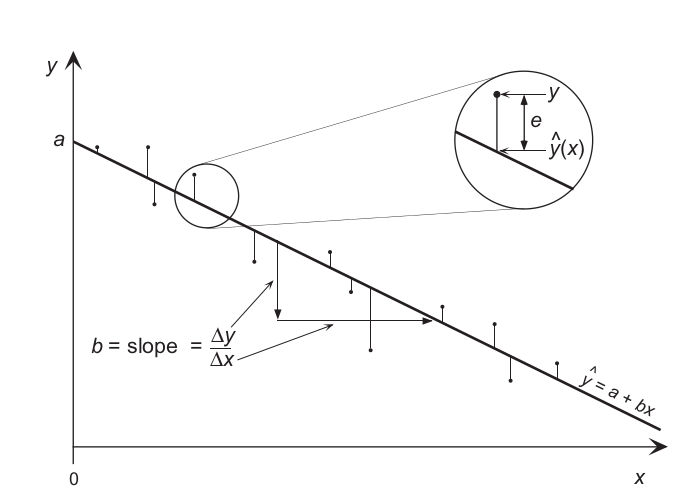
#### **<font color="OrangeRed"> Ilustración esquemática de regresión lineal simple. La línea de regresión se elige como aquella que minimiza alguna medida de las diferencias verticales (los residuos) entre los puntos y la línea. En la regresión de mínimos cuadrados, esa medida es la suma de las distancias verticales al cuadrado. El zoom insertado muestra un residuo, $e$, como la diferencia entre un punto de datos y la línea de regresión. </font>**

#### **<font color="ForestGreen"> Cálculo de los coeficientes de regresión </font>**

La estimación en la regresión lineal se basa en el método de **mínimos cuadrados** ordinarios (MCO), que es una técnica estadística para encontrar los parámetros que minimizan la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo. Este método es ampliamente utilizado debido a su simplicidad y robustez.

En la regresión lineal, queremos ajustar una línea recta a nuestros datos. La ecuación general de esta línea es $Y=\beta_0+\beta_1X+\epsilon$, donde $Y$ es la variable dependiente, $X$ es la variable independiente, $\beta_0$ es la intersección en el eje $Y$, $\beta_1$ es la pendiente de la línea y $\epsilon$ es el término de error, que representa la discrepancia entre los valores observados y los valores predichos. Se asume que toda predicción está sujeta a un error aleatorio que podría modificar nuestros datos. 

El objetivo del método de **mínimos cuadrados** es encontrar los valores de $\beta_0$ y $\beta_1$ que minimicen la suma de los cuadrados de los residuos, es decir, la suma de las diferencias entre los valores observados de $Y$ y los valores predichos por el modelo $\hat{Y}$. Matemáticamente, esto se expresa como:

\begin{align}
min \sum_{i=1}^{n} \epsilon_i
\end{align}

Los estimadores de mínimos cuadrados para  $\beta_0$ y $\beta_1$ se pueden encontrar derivando parcialmente la función de mínimos cuadrados con respecto a  $\beta_0$ y $\beta_1$, y luego igualando las derivadas a cero para encontrar los puntos críticos. Los estimadores resultantes son:

\begin{align}
 \beta_1= \frac{\sum_{i=1}^{n} (x_i-\mu_x)(y_i-\mu_y)}{\sum_{i=1}^{n} (x_i-\mu_x)^2}
\end{align}

y 

\begin{align}
 \beta_0= \mu_y-\beta_1\mu_x
\end{align}

Donde $\beta_1$ es la pendiente estimada, $\beta_0$ es la intersección estimada u ordenada al origen, $\mu_x$ y $\mu_y$ son las medias de las variables independiente y dependiente respectivamente, y $N$ es el número total de observaciones.



In [38]:
(X - np.mean(X)) * (y - np.mean(y))

array([ 1.23842954e-01,  1.34684716e+01,  3.73365935e+00, -2.06745865e-01,
       -1.53872539e-01,  8.94159902e+00, -9.93927694e-02,  3.35490191e+01,
        4.19903582e+01,  8.26445554e-01,  1.84441506e+01,  1.20736949e+00,
        1.82972356e+00,  4.45574285e+01,  3.16228514e+01,  2.77641907e+01,
        4.17878436e+01,  3.16289084e+01,  1.84495262e+01,  3.23892651e+01,
        5.97242489e+01,  1.62764651e+01,  1.91113841e-01,  2.13315030e+01,
        2.99776157e+01,  8.51317532e+00,  2.37024715e+01,  4.00985870e+01,
        1.33020908e+00, -7.29802149e-02,  5.18417382e+00,  2.03246039e+01,
        2.30750607e-01,  3.47224554e+00,  4.33138853e+01,  5.07953205e+00,
        4.93261740e+00,  3.65461417e+00,  4.63458051e+01,  1.02640384e+01,
        2.35819136e+00,  7.17731337e-01,  1.03484787e+01,  2.93637937e+01,
        5.80474561e+00,  7.15188703e+00,  1.54185348e+01,  1.79513349e+01,
        4.19748735e+00,  2.14515550e+00,  9.60206080e-01,  1.15204776e-01,
        4.86961852e+01,  

In [39]:
m=beta1=np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X))**2)
print('pendiente',m)

pendiente 1.9936935021402038


In [40]:
b=beta0=np.mean(y)-m*np.mean(X)
print('ordenada al origen',b)

ordenada al origen 0.2221510774472275


Ahora que ya sabemos cómo funciona, podemos hacer este procesamiento una función, para usarla muchas veces!

In [12]:
def beta1_calc(X,y):
    m=beta1=np.sum((X - np.mean(X)) * (y - np.mean(y))) / np.sum((X - np.mean(X))**2)
    return beta1

In [13]:
# Predicción utilizando la ecuación de regresión
predicciones = b + m * X

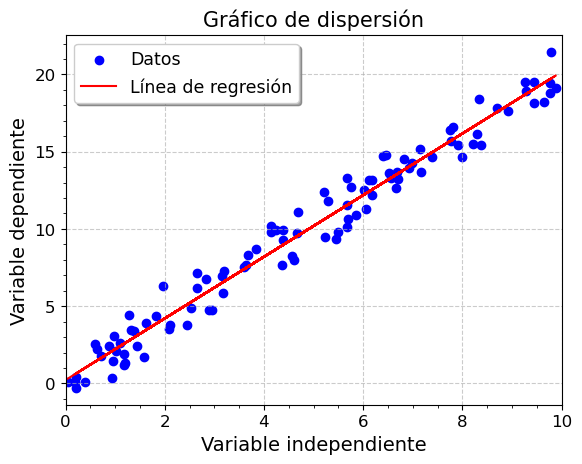

In [14]:
# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, predicciones, color='red', label='Línea de regresión')

grafico_linea_ts(0,10,'Variable independiente','Variable dependiente','Gráfico de dispersión',legend=True)

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1 - Error cuadrático medio </font>**

<font color="DarkBlue"> 1. Calcule el error cuadrático medio (MSE) para nuestras predicciones anteriores. El error cuadrático medio (MSE, por sus siglas en inglés) mide qué tan parecida es una distribución comparada con otra. Su fórmula es:

\begin{align}
MSE=\frac{1}{N}\sum_{i=1}^{N} (Y_i-\hat{Y}_i)^2
\end{align}
    
<font color="DarkBlue">    donde $\hat{Y_i}$ es el valor de Y que consideramos como verdadero, una observación o un valor calculado analíticamente y $Y_i$ es un pronóstico o valor estimado.
        
---

#### **<font color="ForestGreen"> Coeficiente de correlacion de Pearson </font>**

El coeficiente de correlación de Pearson es una medida estadística que se utiliza para evaluar la fuerza y dirección de la relación lineal entre dos variables continuas. Es una medida de la covariación entre las dos variables, normalizada por sus desviaciones estándar individuales.

El coeficiente de correlación de Pearson tiene los siguientes elementos que son importantes de entender:

1. Rango y Signo: El coeficiente de correlación de Pearson, denotado como $r$, tiene un rango de -1 a 1. Un valor de -1 indica una correlación negativa perfecta, lo que significa que a medida que una variable aumenta, la otra variable disminuye en una relación perfectamente lineal negativa. Un valor de 1 indica una correlación positiva perfecta, lo que significa que a medida que una variable aumenta, la otra variable también aumenta en una relación perfectamente lineal positiva. Un valor de 0 indica que no hay correlación lineal entre las variables.

2. Fuerza de la relación: Cuanto más cercano sea el valor absoluto de $r$ a 1, más fuerte será la relación lineal entre las variables. Por ejemplo, si $r=0.8$, hay una fuerte relación lineal positiva entre las variables. Si $r=-0.6$, hay una fuerte relación lineal negativa entre las variables.

3. Dirección de la relación: El signo de $r$ indica la dirección de la relación lineal. Un valor positivo de $r$ indica una relación lineal positiva, mientras que un valor negativo indica una relación lineal negativa.

4. Limitaciones: Es importante tener en cuenta que el coeficiente de correlación de Pearson solo mide la relación lineal entre las variables. Puede haber relaciones no lineales que no serían capturadas por $r$. Además, el coeficiente de correlación de Pearson no indica causalidad. Solo porque dos variables estén correlacionadas, no significa que una causa la otra. Es necesario realizar estudios adicionales para determinar la causalidad.

El índice de correlación de Pearson se puede calcular con la siguiente ecuación:


\begin{align}
 r_{x,y}= \frac{\sum_{i=1}^{n} (x_i-\mu_x)(y_i-\mu_y)}{\sqrt{\sum_{i=1}^{n} (x_i-\mu_x)^2\sum_{i=1}^{n} (y_i-\mu_y)^2)}}
\end{align}

La fórmula del coeficiente calcula la covarianza entre las dos variables, normalizada por el producto de sus desviaciones estándar. 

In [15]:
def calculate_r(x,y):
    numerador=np.sum((x - np.mean(x)) * (y - np.mean(y))) 
    denominador= np.sqrt(np.sum((x - np.mean(x))**2)*np.sum((y - np.mean(y))**2))
    return numerador/denominador
r=calculate_r(X,y)
print('Coeficiente de correlacion de Pearson',r)

Coeficiente de correlacion de Pearson 0.9853103832101714


La función `np.corrcoef` de NumPy se utiliza para calcular el coeficiente de correlación de Pearson entre dos o más conjuntos de datos. Proporciona una forma conveniente de calcular rápidamente la matriz de correlación entre múltiples variables.

El resultado de esta función es una matriz de 2x2 que tenemos que rebanar para obtener nuestro coeficiente. 

In [16]:
np.corrcoef(X,y)

array([[1.        , 0.98531038],
       [0.98531038, 1.        ]])

In [17]:
rnpy=np.corrcoef(X,y)[0,1]
print('Coeficiente de correlacion de Pearson via numpy',rnpy)

Coeficiente de correlacion de Pearson via numpy 0.9853103832101713


#### **<font color="ForestGreen"> Coeficiente de determinación </font>**

El coeficiente de determinación, denotado como $R^2$, es una medida estadística que indica la proporción de la varianza en la variable dependiente que es explicada por el modelo de regresión. En otras palabras, $R^2$ proporciona una medida de qué tan bien se ajustan los valores predichos por el modelo a los valores reales de la variable dependiente.

A un nivel alto, el coeficiente de determinación se puede entender de la siguiente manera:

1. Rango y Significado: El coeficiente de determinación $R^2$ tiene un rango de 0 a 1. Un valor de 0 indica que el modelo de regresión no explica ninguna variabilidad en la variable dependiente, mientras que un valor de 1 indica que el modelo explica toda la variabilidad en la variable dependiente. En otras palabras, cuanto más cercano sea $R^2$ a 1, mejor se ajusta el modelo a los datos.

2. Interpretación: R2R2 se interpreta como la proporción de la varianza total de la variable dependiente que es explicada por el modelo de regresión. Por ejemplo, un $R^2$ de 0.8 indicaría que el 80% de la variabilidad en la variable dependiente se explica por el modelo de regresión.

3. Relación con la Correlación: El coeficiente de determinación está relacionado con el coeficiente de correlación de Pearson ($r$). En particular, $R^2$ es el cuadrado del coeficiente de correlación ($r$) entre las variables dependiente e independiente en el modelo de regresión. Es decir, $R^2=r$.

4. Limitaciones: Aunque $R^2$ proporciona una medida útil de qué tan bien se ajusta el modelo a los datos, no indica necesariamente si el modelo es válido o si los resultados son significativos. Además, un $R^2$ alto no garantiza que el modelo sea útil o que las predicciones sean precisas. Siempre es importante evaluar el modelo en su contexto y considerar otros factores como la significancia estadística y la validez del modelo.

En resumen, el coeficiente de determinación $R^2$ es una medida importante en la regresión que indica qué tan bien se ajustan los valores predichos por el modelo a los valores reales de la variable dependiente. 

In [18]:
R2=np.sqrt(r)
print('El coeficiente de determinación',R2)

El coeficiente de determinación 0.992628018549835


---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 2   </font>**

<font color="DarkBlue"> Considere las variables $x$ y $y$ definidas en la siguiente celda.

<font color="DarkBlue"> 1. Calcule los coeficientes de regresión utilizando las fórmulas vistas en la celda anterior. Además, haga un segundo cálculo para la pendiente $\beta_0$ con la fórmula siguiente: 
    
\begin{align}
\beta_0=\frac{S_y}{S_x}r_{x,y}
\end{align}    
 
<font color="DarkBlue"> Compruebe si son las mismas estimaciones para el parámetro de la pendiente.
    
<font color="DarkBlue"> 2. Haga el gráfico de dispersión junto con la línea de regresión.  
    
<font color="DarkBlue"> 3. Calcule el coeficiente de determinación e interprete sus resultados, ¿hay una relación lineal entre sus variables?    
        
---

In [19]:
# Definir los datos de la variable x (por ejemplo, profundidad del suelo en metros)
x = np.arange(0, 30, 1)

# Definir los datos de la variable y (por ejemplo, concentración de un contaminante en el suelo)
# Establecemos una relación negativa donde la concentración disminuye con la profundidad
y = 50 - 1.5 * x

# Agregamos un poco de ruido a los datos para hacerlos más realistas
# Esto se puede hacer añadiendo un pequeño valor aleatorio a cada punto de datos
# Utilizamos np.random.uniform para generar números aleatorios uniformemente distribuidos en el rango entre parentesis
ruido = np.random.uniform(-10, 15, size=len(x))
y += ruido

#### **<font color="ForestGreen"> Aprendiendo con paquetes </font>**

Podemos utilizar el paquete `statsmodels` en Python para realizar la regresión lineal con el método de mínimos cuadrados ordinarios (OLS). Statsmodels es una biblioteca de Python que proporciona clases y funciones para estimar y analizar modelos estadísticos, realizar pruebas de hipótesis y explorar datos estadísticos. Es ampliamente utilizada en la comunidad de ciencias sociales y científicas para llevar a cabo análisis de datos y modelado estadístico.

Statsmodels ofrece una amplia gama de modelos de regresión, incluyendo regresión lineal, regresión logística, regresión robusta, regresión no lineal, regresión por mínimos cuadrados ordinarios (MCO) y más.

In [20]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [21]:
import statsmodels.api as sm

In [22]:
# Datos de ejemplo (concentración de un elemento químico y altura de las plantas)
concentracion_suelo = np.array([1.2,1.5, 2,2.5, 3.1, 3.5, 4.0, 4.4,4.6, 5.2, 5.75, 6.0, 6.77, 7.1, 7.5, 8.2, 9.0, 10.5])
altura_plantas = np.array([10, 10.9,11, 12, 14, 15, 16, 17,16.9, 18, 18.5, 20, 21, 22, 24, 25, 26, 28])

In [23]:
# Añadir una constante para el término de intersección en el modelo
X = sm.add_constant(concentracion_suelo)

In [24]:
# Ajustar el modelo de regresión lineal utilizando OLS (Mínimos cuadrados ordinarios)
modelo = sm.OLS(altura_plantas, X).fit()

Cuando ajustas un modelo de regresión lineal utilizando `sm.OLS().fit()` en Statsmodels, obtienes un objeto que contiene varios atributos importantes que te permiten analizar y evaluar el modelo ajustado. Algunos de los atributos más importantes de este objeto son:

- `params`: Este atributo devuelve los coeficientes estimados para cada variable independiente en el modelo de regresión. Por ejemplo, si tienes un modelo con una variable independiente, params devolverá el coeficiente estimado para esa variable.

- `rsquared`: Este atributo devuelve el coeficiente de determinación ($R^2$) del modelo de regresión. Proporciona una medida de qué tan bien se ajustan los valores predichos por el modelo a los valores reales de la variable dependiente.

- `summary()` en Statsmodels se utiliza para obtener un resumen detallado del modelo de regresión lineal ajustado. Proporciona una descripción completa de las estadísticas relevantes del modelo, incluyendo los coeficientes estimados, los errores estándar, los valores p, las estadísticas de ajuste y más. 

In [25]:
# Imprimir los resultados del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1637.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           1.52e-17
Time:                        17:58:23   Log-Likelihood:                -13.878
No. Observations:                  18   AIC:                             31.76
Df Residuals:                      16   BIC:                             33.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5392      0.291     25.875      0.0

/home/jorgelsgf/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
modelo.params

array([7.5392318 , 2.04259672])

In [27]:
beta1_calc(concentracion_suelo,altura_plantas)

2.042596720645404

In [28]:
b0,b1=modelo.params
R2=modelo.rsquared
print(b0,b1,R2)

7.5392317994274105 2.0425967206454048 0.9903178343879843


El método `predict()` en Statsmodels se utiliza para realizar predicciones utilizando el modelo de regresión ajustado. Permite predecir los valores de la variable dependiente para nuevos conjuntos de datos o para los mismos datos utilizados para ajustar el modelo. 

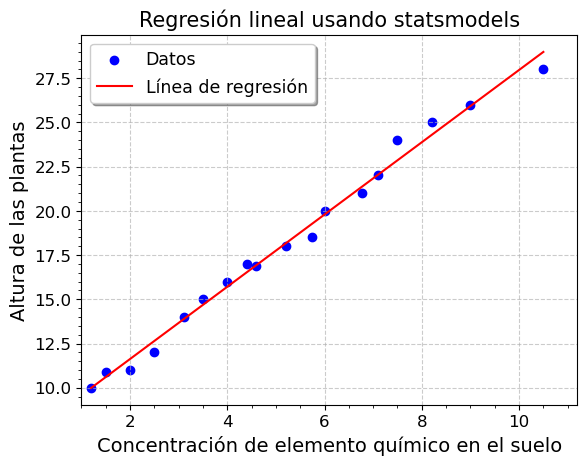

In [29]:
# Graficar los datos y la línea de regresión
plt.scatter(concentracion_suelo, altura_plantas, color='blue', label='Datos')
plt.plot(concentracion_suelo, modelo.predict(X), color='red', label='Línea de regresión')
grafico_linea_ts(1,11.2,'Concentración de elemento químico en el suelo',
                 'Altura de las plantas','Regresión lineal usando statsmodels',legend=True)

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 3   </font>**

<font color="DarkBlue"> Utilizando statsmodels, calcule lo siguiente utilizando las variables $X$, $y$ definidas en el notebook:

<font color="DarkBlue"> 1. Coeficientes de regresión, coeficiente de correlación de Pearson y coeficiente de Determinación. 
     
<font color="DarkBlue"> 2. Grafique la predicción del modelo junto con los gráficos de dispersión. 
    
<font color="DarkBlue"> 3. Utilice `plt.text` para agregar el coeficiente de determinación al gráfico. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
    

        
---